In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

%matplotlib inline

In [2]:
df_cat = pd.read_csv('../data/categorical_data.csv')

In [3]:
df_cat = df_cat.drop(['Name'], axis=1)

In [4]:
df_cat

,ID,Nationality,Club,Preferred Foot,Work Rate
0,158023,Argentina,FC Barcelona,Left,Medium/ Medium
1,20801,Portugal,Juventus,Right,High/ Low
2,190871,Brazil,Paris Saint-Germain,Right,High/ Medium
3,192985,Belgium,Manchester City,Right,High/ High
4,183277,Belgium,Chelsea,Right,High/ Medium
...,...,...,...,...,...
14738,238813,England,Crewe Alexandra,Right,Medium/ Medium
14739,243165,Sweden,Trelleborgs FF,Right,Medium/ Medium
14740,241638,England,Cambridge United,Right,Medium/ Medium
14741,246268,England,Tranmere Rovers,Right,Medium/ Medium


In [5]:
df_cat_dummies = pd.get_dummies(df_cat)

In [6]:
fifa = df_cat_dummies.to_numpy()

In [7]:
fifa

array([[158023,      0,      0, ...,      0,      0,      1],
       [ 20801,      0,      0, ...,      0,      0,      0],
       [190871,      0,      0, ...,      0,      0,      0],
       ...,
       [241638,      0,      0, ...,      0,      0,      1],
       [246268,      0,      0, ...,      0,      0,      1],
       [246269,      0,      0, ...,      0,      0,      1]])

In [8]:
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(fifa.data)

/home/javier/miniconda2/envs/entorno/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda2/envs/entorno/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/javier/miniconda2/envs/entorno/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda2/

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [9]:
embedding = reducer.transform(fifa.data)

embedding

array([[-16.232563 ,   1.0828328],
       [-12.861734 ,  -1.6622515],
       [ -6.0526943,   6.5383472],
       ...,
       [  3.4396431,  -3.4968827],
       [-10.899237 , -12.051297 ],
       [-10.927574 , -12.021071 ]], dtype=float32)

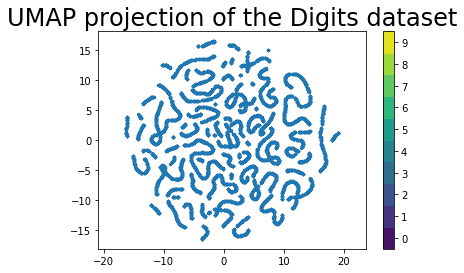

In [10]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

**kmeans**

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(fifa.data)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [12]:
kmeans.predict(fifa.data)

array([1, 2, 1, ..., 0, 0, 0], dtype=int32)

In [13]:
kmeans.cluster_centers_[0]

array([2.31455841e+05, 4.25803704e-04, 2.34192037e-03, 2.44837130e-03,
       1.10724147e-17, 3.19352778e-04, 3.19352778e-04, 5.80157547e-02,
       5.32254631e-04, 1.17096019e-02, 1.58611880e-02, 3.19352778e-04,
       3.83265468e-17, 1.06450926e-04, 1.09644454e-02, 1.06450926e-04,
       8.51607409e-04, 1.10724147e-17, 4.25803704e-04, 2.87417501e-03,
       1.06450926e-04, 5.49286779e-02, 6.38705557e-04, 6.38705557e-04,
       2.12901852e-04, 5.85480094e-03, 3.93868427e-03, 1.38386204e-03,
       1.06450926e-04, 2.12901852e-04, 2.76772408e-02, 2.75707899e-02,
       4.98190334e-02, 2.12901852e-04, 1.27741111e-03, 1.91611667e-03,
       8.62252502e-03, 2.12901852e-04, 5.32254631e-04, 6.38705557e-04,
       2.98062593e-03, 2.23546945e-03, 1.91611667e-02, 2.12901852e-04,
       2.02256760e-03, 1.49031297e-03, 4.25803704e-04, 7.43027464e-02,
       3.19352778e-04, 1.06450926e-04, 3.19352778e-04, 1.10724147e-17,
       1.06450926e-03, 2.12901852e-04, 1.10724147e-17, 3.93868427e-03,
      

In [14]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(embedding)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

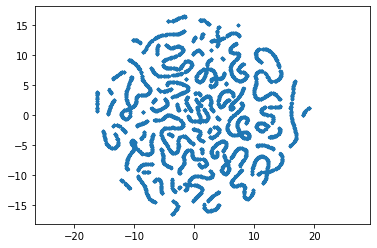

In [15]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
plt.gca().set_aspect('equal', 'datalim')

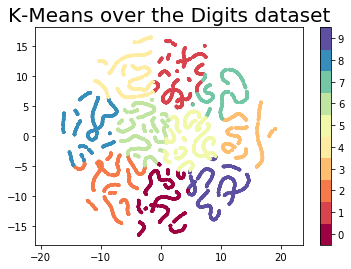

In [16]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the Digits dataset', fontsize=20);

## **DBSCAN**

In [17]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN().fit(embedding)

clustering

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

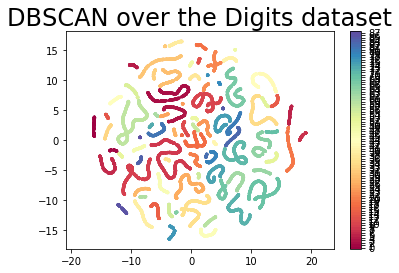

In [18]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=clustering.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clustering.labels_))+1)-0.5).set_ticks(np.arange(len(np.unique(clustering.labels_))))
plt.title('DBSCAN over the Digits dataset', fontsize=24);

**HDBSCAN**

In [19]:
import hdbscan

clusterer = hdbscan.HDBSCAN()

clusterer.fit(embedding)

clusterer

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

RuntimeError: Locator attempting to generate 1124 ticks from 0 to 1123: exceeds Locator.MAXTICKS

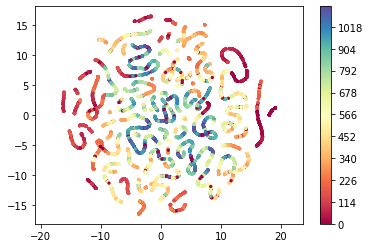

In [20]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusterer.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clusterer.labels_)))+0.5).set_ticks(np.arange(len(np.unique(clusterer.labels_))))
plt.title('HDBSCAN over the Digits dataset', fontsize=24);